# Webscaping for number of times each article has been cited

In [1]:
# basic imports 
import numpy as np
import pandas as pd

# scraping imports
import requests
from bs4 import BeautifulSoup
import time

# Plotting imports
from matplotlib import pyplot as plt

# I/O
import pickle
import json

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load jounral article data
data = pd.read_csv("neuroscience_articles.csv")

# Look at columns in dataset
data.columns

Index(['Unnamed: 0', 'citation_abstract', 'citation_author',
       'citation_author_email', 'citation_author_institution', 'citation_date',
       'citation_doi', 'citation_issn', 'citation_journal_abbrev',
       'citation_journal_title', 'citation_keywords', 'citation_language',
       'citation_online_date', 'citation_pages', 'citation_pdf_url',
       'citation_publication_date', 'citation_publisher', 'citation_title',
       'citation_volume', 'dc.identifier', 'description', 'img', 'keywords',
       'text', 'title', 'url'],
      dtype='object')

In [3]:
# Create a column for unique ID
data['ID'] = data.iloc[:,0]

(array([ 391.,  562.,  955., 2052., 2512., 2241., 2106., 2349., 2530.,
         600.]),
 array([2010. , 2010.9, 2011.8, 2012.7, 2013.6, 2014.5, 2015.4, 2016.3,
        2017.2, 2018.1, 2019. ]),
 <BarContainer object of 10 artists>)

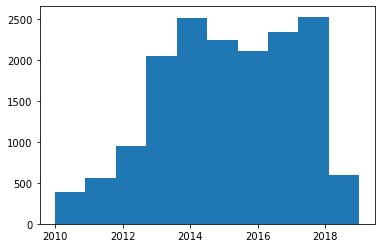

In [4]:
# Look at distribution of year published
year_data = data.citation_date
year_data = year_data[~np.isnan(year_data)] 
plt.hist(year_data)

In [5]:
# Drop any articles without a doi
data_nandoi = data.dropna(subset=['citation_doi'])
dois = data_nandoi['citation_doi']
len(dois)

16298

## Web Scraping for Citation Number

In [12]:
# Initialize scraping header
headers = {
    'User-agent':
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"}
url_base = "https://pubmed.ncbi.nlm.nih.gov/?term=%22"

# Initialize storage variable
citations = np.zeros(len(dois)) * np.nan

# Set initial proxy 
#proxy = get_rotating_proxy()

# Loop over article dois
for ii in range(0,len(citations)):
    
    # Get single article doi
    curr_doi = dois[ii]
    
    # Construct query url
    url = url_base+curr_doi+'%22'
    
    #html = np.nan
    #while isinstance(html,float):
        # Attempt Query
        #try:
    try:
        html = requests.get(url, headers=headers, timeout=5).text
            #except Exception as e:
                #print('Error occurred: ' + str(e))
                #print('Rotating Proxy...')
                #html = np.nan
                #proxy = get_rotating_proxy() # rotate proxy

        # Convert text 
        soup = BeautifulSoup(html, 'lxml')

        # Extract citation count html element
        citation_element = soup.select_one('.amount').text

        # Extract number only and save
        citations[ii] = int(citation_element)
        
    except Exception as e:
        print('Exception: ' + str(e))
        citations[ii] = np.nan
    
    # Print progress
    print('     Citations: ' + str(citations[ii]) + ', ' + str(ii+1) + '/' + str(len(citations)) 
          + ' finished...')
    
    # Sleep for rand seconds between 4 and 10 so we don't get ip blocked
    time.sleep(np.random.randint(low=4, high=10))

# Save out citations data
pickle.dump(citations, 'article_citations.pickle')

     Citations: 7.0, 12317/16298 finished...
     Citations: 4.0, 12318/16298 finished...
     Citations: 16.0, 12319/16298 finished...
     Citations: 2.0, 12320/16298 finished...
     Citations: 8.0, 12321/16298 finished...
     Citations: 13.0, 12322/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12323/16298 finished...
     Citations: 20.0, 12324/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12325/16298 finished...
     Citations: 4.0, 12326/16298 finished...
     Citations: 7.0, 12327/16298 finished...
     Citations: 9.0, 12328/16298 finished...
     Citations: 12.0, 12329/16298 finished...
     Citations: 4.0, 12330/16298 finished...
     Citations: 9.0, 12331/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12332/16298 finished...
     Citations: 1.0, 12333/16298 finished...
     Citations: 2.0, 12334/16298 finished...
     Citations: 4.0, 12335/

     Citations: 3.0, 12491/16298 finished...
     Citations: 6.0, 12492/16298 finished...
     Citations: 27.0, 12493/16298 finished...
     Citations: 4.0, 12494/16298 finished...
     Citations: 3.0, 12495/16298 finished...
     Citations: 5.0, 12496/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12497/16298 finished...
     Citations: 12.0, 12498/16298 finished...
     Citations: 23.0, 12499/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12500/16298 finished...
     Citations: 5.0, 12501/16298 finished...
     Citations: 9.0, 12502/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12503/16298 finished...
     Citations: 6.0, 12504/16298 finished...
     Citations: 2.0, 12505/16298 finished...
     Citations: 1.0, 12506/16298 finished...
     Citations: 1.0, 12507/16298 finished...
     Citations: 15.0, 12508/16298 finished...
     Citations: 8.0, 12509/

     Citations: 5.0, 12657/16298 finished...
     Citations: 46.0, 12658/16298 finished...
     Citations: 9.0, 12659/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12660/16298 finished...
     Citations: 1.0, 12661/16298 finished...
     Citations: 4.0, 12662/16298 finished...
     Citations: 10.0, 12663/16298 finished...
     Citations: 3.0, 12664/16298 finished...
     Citations: 12.0, 12665/16298 finished...
     Citations: 10.0, 12666/16298 finished...
     Citations: 2.0, 12667/16298 finished...
     Citations: 3.0, 12668/16298 finished...
     Citations: 27.0, 12669/16298 finished...
     Citations: 9.0, 12670/16298 finished...
     Citations: 2.0, 12671/16298 finished...
     Citations: 63.0, 12672/16298 finished...
     Citations: 2.0, 12673/16298 finished...
     Citations: 3.0, 12674/16298 finished...
     Citations: 2.0, 12675/16298 finished...
     Citations: 4.0, 12676/16298 finished...
     Citations: 2.0, 12677/16298 finished

Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12827/16298 finished...
     Citations: 83.0, 12828/16298 finished...
     Citations: 3.0, 12829/16298 finished...
     Citations: 2.0, 12830/16298 finished...
     Citations: 4.0, 12831/16298 finished...
     Citations: 6.0, 12832/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12833/16298 finished...
     Citations: 7.0, 12834/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 12835/16298 finished...
     Citations: 5.0, 12836/16298 finished...
     Citations: 3.0, 12837/16298 finished...
     Citations: 3.0, 12838/16298 finished...
     Citations: 15.0, 12839/16298 finished...
     Citations: 8.0, 12840/16298 finished...
     Citations: 2.0, 12841/16298 finished...
     Citations: 8.0, 12842/16298 finished...
     Citations: 6.0, 12843/16298 finished...
     Citations: 7.0, 12844/16298 finished...
     Citations: 23.0, 12845/1

     Citations: 2.0, 12990/16298 finished...
     Citations: 2.0, 12991/16298 finished...
     Citations: 6.0, 12992/16298 finished...
     Citations: 17.0, 12993/16298 finished...
     Citations: 3.0, 12994/16298 finished...
     Citations: 1.0, 12995/16298 finished...
     Citations: 20.0, 12996/16298 finished...
     Citations: 17.0, 12997/16298 finished...
     Citations: 2.0, 12998/16298 finished...
     Citations: 3.0, 12999/16298 finished...
     Citations: 1.0, 13000/16298 finished...
     Citations: 13.0, 13001/16298 finished...
     Citations: 4.0, 13002/16298 finished...
     Citations: 2.0, 13003/16298 finished...
     Citations: 3.0, 13004/16298 finished...
     Citations: 1.0, 13005/16298 finished...
     Citations: 11.0, 13006/16298 finished...
     Citations: 2.0, 13007/16298 finished...
     Citations: 3.0, 13008/16298 finished...
     Citations: 10.0, 13009/16298 finished...
     Citations: 7.0, 13010/16298 finished...
     Citations: 7.0, 13011/16298 finished...
    

     Citations: 2.0, 13154/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13155/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13156/16298 finished...
     Citations: 5.0, 13157/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13158/16298 finished...
     Citations: 11.0, 13159/16298 finished...
     Citations: 10.0, 13160/16298 finished...
     Citations: 5.0, 13161/16298 finished...
     Citations: 3.0, 13162/16298 finished...
     Citations: 4.0, 13163/16298 finished...
     Citations: 2.0, 13164/16298 finished...
     Citations: 2.0, 13165/16298 finished...
     Citations: 32.0, 13166/16298 finished...
     Citations: 12.0, 13167/16298 finished...
     Citations: 23.0, 13168/16298 finished...
     Citations: 9.0, 13169/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13170/16298 finished...
Exception: 'NoneTy

     Citations: 5.0, 13319/16298 finished...
     Citations: 21.0, 13320/16298 finished...
     Citations: 7.0, 13321/16298 finished...
     Citations: 20.0, 13322/16298 finished...
     Citations: 6.0, 13323/16298 finished...
     Citations: 4.0, 13324/16298 finished...
     Citations: 5.0, 13325/16298 finished...
     Citations: 12.0, 13326/16298 finished...
     Citations: 5.0, 13327/16298 finished...
     Citations: 9.0, 13328/16298 finished...
     Citations: 23.0, 13329/16298 finished...
     Citations: 6.0, 13330/16298 finished...
     Citations: 12.0, 13331/16298 finished...
     Citations: 5.0, 13332/16298 finished...
     Citations: 5.0, 13333/16298 finished...
     Citations: 19.0, 13334/16298 finished...
     Citations: 3.0, 13335/16298 finished...
     Citations: 1.0, 13336/16298 finished...
     Citations: 4.0, 13337/16298 finished...
     Citations: 10.0, 13338/16298 finished...
     Citations: 12.0, 13339/16298 finished...
     Citations: 2.0, 13340/16298 finished...
  

     Citations: 3.0, 13490/16298 finished...
     Citations: 5.0, 13491/16298 finished...
     Citations: 5.0, 13492/16298 finished...
     Citations: 6.0, 13493/16298 finished...
     Citations: 6.0, 13494/16298 finished...
     Citations: 2.0, 13495/16298 finished...
     Citations: 4.0, 13496/16298 finished...
     Citations: 5.0, 13497/16298 finished...
     Citations: 15.0, 13498/16298 finished...
     Citations: 7.0, 13499/16298 finished...
     Citations: 5.0, 13500/16298 finished...
     Citations: 16.0, 13501/16298 finished...
     Citations: 7.0, 13502/16298 finished...
     Citations: 5.0, 13503/16298 finished...
     Citations: 8.0, 13504/16298 finished...
     Citations: 2.0, 13505/16298 finished...
     Citations: 8.0, 13506/16298 finished...
     Citations: 37.0, 13507/16298 finished...
     Citations: 2.0, 13508/16298 finished...
     Citations: 5.0, 13509/16298 finished...
     Citations: 6.0, 13510/16298 finished...
     Citations: 2.0, 13511/16298 finished...
     Ci

     Citations: 11.0, 13660/16298 finished...
     Citations: 1.0, 13661/16298 finished...
     Citations: 16.0, 13662/16298 finished...
     Citations: 30.0, 13663/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13664/16298 finished...
     Citations: 4.0, 13665/16298 finished...
     Citations: 2.0, 13666/16298 finished...
     Citations: 0.0, 13667/16298 finished...
     Citations: 2.0, 13668/16298 finished...
     Citations: 42.0, 13669/16298 finished...
     Citations: 12.0, 13670/16298 finished...
     Citations: 3.0, 13671/16298 finished...
     Citations: 2.0, 13672/16298 finished...
     Citations: 1.0, 13673/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13674/16298 finished...
     Citations: 10.0, 13675/16298 finished...
     Citations: 2.0, 13676/16298 finished...
     Citations: 4.0, 13677/16298 finished...
     Citations: 9.0, 13678/16298 finished...
     Citations: 2.0, 13679/16298 

     Citations: 17.0, 13820/16298 finished...
     Citations: 1.0, 13821/16298 finished...
     Citations: 3.0, 13822/16298 finished...
     Citations: 2.0, 13823/16298 finished...
     Citations: 17.0, 13824/16298 finished...
     Citations: 12.0, 13825/16298 finished...
     Citations: 1.0, 13826/16298 finished...
     Citations: 5.0, 13827/16298 finished...
     Citations: 11.0, 13828/16298 finished...
     Citations: 6.0, 13829/16298 finished...
     Citations: 5.0, 13830/16298 finished...
     Citations: 1.0, 13831/16298 finished...
     Citations: 24.0, 13832/16298 finished...
     Citations: 37.0, 13833/16298 finished...
     Citations: 4.0, 13834/16298 finished...
     Citations: 7.0, 13835/16298 finished...
     Citations: 3.0, 13836/16298 finished...
     Citations: 8.0, 13837/16298 finished...
     Citations: 4.0, 13838/16298 finished...
     Citations: 4.0, 13839/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13840/16298 finished

     Citations: 2.0, 13984/16298 finished...
     Citations: 61.0, 13985/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13986/16298 finished...
     Citations: 7.0, 13987/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 13988/16298 finished...
     Citations: 4.0, 13989/16298 finished...
     Citations: 4.0, 13990/16298 finished...
     Citations: 2.0, 13991/16298 finished...
     Citations: 15.0, 13992/16298 finished...
     Citations: 5.0, 13993/16298 finished...
     Citations: 31.0, 13994/16298 finished...
     Citations: 34.0, 13995/16298 finished...
     Citations: 10.0, 13996/16298 finished...
     Citations: 13.0, 13997/16298 finished...
     Citations: 2.0, 13998/16298 finished...
     Citations: 3.0, 13999/16298 finished...
     Citations: 4.0, 14000/16298 finished...
     Citations: 3.0, 14001/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 1400

     Citations: 13.0, 14152/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14153/16298 finished...
     Citations: 41.0, 14154/16298 finished...
     Citations: 14.0, 14155/16298 finished...
     Citations: 18.0, 14156/16298 finished...
     Citations: 9.0, 14157/16298 finished...
     Citations: 1.0, 14158/16298 finished...
     Citations: 10.0, 14159/16298 finished...
     Citations: 3.0, 14160/16298 finished...
     Citations: 5.0, 14161/16298 finished...
     Citations: 9.0, 14162/16298 finished...
     Citations: 3.0, 14163/16298 finished...
     Citations: 5.0, 14164/16298 finished...
     Citations: 6.0, 14165/16298 finished...
     Citations: 2.0, 14166/16298 finished...
     Citations: 14.0, 14167/16298 finished...
     Citations: 7.0, 14168/16298 finished...
     Citations: 1.0, 14169/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14170/16298 finished...
     Citations: 9.0, 14171/16298 

Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14322/16298 finished...
     Citations: 7.0, 14323/16298 finished...
     Citations: 3.0, 14324/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14325/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14326/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14327/16298 finished...
     Citations: 4.0, 14328/16298 finished...
     Citations: 16.0, 14329/16298 finished...
     Citations: 4.0, 14330/16298 finished...
     Citations: 24.0, 14331/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14332/16298 finished...
     Citations: 19.0, 14333/16298 finished...
     Citations: 18.0, 14334/16298 finished...
     Citations: 1.0, 14335/16298 finished...
     Citations: 8.0, 14336/16298 finished...
     Citations: 3.0, 14337/16298 finished...
     Citati

     Citations: 2.0, 14483/16298 finished...
     Citations: 4.0, 14484/16298 finished...
     Citations: 2.0, 14485/16298 finished...
     Citations: 10.0, 14486/16298 finished...
     Citations: 11.0, 14487/16298 finished...
     Citations: 12.0, 14488/16298 finished...
     Citations: 6.0, 14489/16298 finished...
     Citations: 48.0, 14490/16298 finished...
     Citations: 2.0, 14491/16298 finished...
     Citations: 5.0, 14492/16298 finished...
     Citations: 3.0, 14493/16298 finished...
     Citations: 5.0, 14494/16298 finished...
     Citations: 20.0, 14495/16298 finished...
     Citations: 12.0, 14496/16298 finished...
     Citations: 4.0, 14497/16298 finished...
     Citations: 1.0, 14498/16298 finished...
     Citations: 15.0, 14499/16298 finished...
     Citations: 7.0, 14500/16298 finished...
     Citations: 8.0, 14501/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14502/16298 finished...
     Citations: 10.0, 14503/16298 finish

     Citations: 6.0, 14649/16298 finished...
     Citations: 3.0, 14650/16298 finished...
     Citations: 6.0, 14651/16298 finished...
     Citations: 22.0, 14652/16298 finished...
     Citations: 11.0, 14653/16298 finished...
     Citations: 10.0, 14654/16298 finished...
     Citations: 3.0, 14655/16298 finished...
     Citations: 9.0, 14656/16298 finished...
     Citations: 3.0, 14657/16298 finished...
     Citations: 9.0, 14658/16298 finished...
     Citations: 4.0, 14659/16298 finished...
     Citations: 10.0, 14660/16298 finished...
     Citations: 3.0, 14661/16298 finished...
     Citations: 6.0, 14662/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14663/16298 finished...
     Citations: 7.0, 14664/16298 finished...
     Citations: 13.0, 14665/16298 finished...
     Citations: 3.0, 14666/16298 finished...
     Citations: 5.0, 14667/16298 finished...
     Citations: 7.0, 14668/16298 finished...
     Citations: 13.0, 14669/16298 finished

     Citations: 2.0, 14820/16298 finished...
     Citations: 8.0, 14821/16298 finished...
     Citations: 5.0, 14822/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14823/16298 finished...
     Citations: 7.0, 14824/16298 finished...
     Citations: 8.0, 14825/16298 finished...
     Citations: 1.0, 14826/16298 finished...
     Citations: 1.0, 14827/16298 finished...
     Citations: 8.0, 14828/16298 finished...
     Citations: 11.0, 14829/16298 finished...
     Citations: 5.0, 14830/16298 finished...
     Citations: 35.0, 14831/16298 finished...
     Citations: 2.0, 14832/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 14833/16298 finished...
     Citations: 1.0, 14834/16298 finished...
     Citations: 1.0, 14835/16298 finished...
     Citations: 3.0, 14836/16298 finished...
     Citations: 14.0, 14837/16298 finished...
     Citations: 3.0, 14838/16298 finished...
     Citations: 1.0, 14839/16298 fin

     Citations: 10.0, 14984/16298 finished...
     Citations: 24.0, 14985/16298 finished...
     Citations: 8.0, 14986/16298 finished...
     Citations: 2.0, 14987/16298 finished...
     Citations: 2.0, 14988/16298 finished...
     Citations: 13.0, 14989/16298 finished...
     Citations: 1.0, 14990/16298 finished...
     Citations: 3.0, 14991/16298 finished...
     Citations: 1.0, 14992/16298 finished...
     Citations: 40.0, 14993/16298 finished...
     Citations: 7.0, 14994/16298 finished...
     Citations: 1.0, 14995/16298 finished...
     Citations: 15.0, 14996/16298 finished...
     Citations: 6.0, 14997/16298 finished...
     Citations: 22.0, 14998/16298 finished...
     Citations: 2.0, 14999/16298 finished...
     Citations: 11.0, 15000/16298 finished...
     Citations: 20.0, 15001/16298 finished...
     Citations: 13.0, 15002/16298 finished...
     Citations: 7.0, 15003/16298 finished...
     Citations: 2.0, 15004/16298 finished...
     Citations: 4.0, 15005/16298 finished...
 

     Citations: 3.0, 15150/16298 finished...
     Citations: 6.0, 15151/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15152/16298 finished...
     Citations: 13.0, 15153/16298 finished...
     Citations: 54.0, 15154/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15155/16298 finished...
     Citations: 2.0, 15156/16298 finished...
     Citations: 4.0, 15157/16298 finished...
     Citations: 5.0, 15158/16298 finished...
     Citations: 10.0, 15159/16298 finished...
     Citations: 13.0, 15160/16298 finished...
     Citations: 25.0, 15161/16298 finished...
     Citations: 3.0, 15162/16298 finished...
     Citations: 6.0, 15163/16298 finished...
     Citations: 5.0, 15164/16298 finished...
     Citations: 7.0, 15165/16298 finished...
     Citations: 4.0, 15166/16298 finished...
     Citations: 6.0, 15167/16298 finished...
     Citations: 3.0, 15168/16298 finished...
     Citations: 3.0, 15169/16298 f

     Citations: 4.0, 15314/16298 finished...
     Citations: 8.0, 15315/16298 finished...
     Citations: 8.0, 15316/16298 finished...
     Citations: 7.0, 15317/16298 finished...
     Citations: 8.0, 15318/16298 finished...
     Citations: 5.0, 15319/16298 finished...
     Citations: 4.0, 15320/16298 finished...
     Citations: 8.0, 15321/16298 finished...
     Citations: 28.0, 15322/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15323/16298 finished...
     Citations: 2.0, 15324/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15325/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15326/16298 finished...
     Citations: 1.0, 15327/16298 finished...
     Citations: 10.0, 15328/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15329/16298 finished...
     Citations: 3.0, 15330/16298 finished...
     Citations: 4.0, 

     Citations: 10.0, 15480/16298 finished...
     Citations: 5.0, 15481/16298 finished...
     Citations: 12.0, 15482/16298 finished...
     Citations: 1.0, 15483/16298 finished...
     Citations: 3.0, 15484/16298 finished...
     Citations: 1.0, 15485/16298 finished...
     Citations: 3.0, 15486/16298 finished...
     Citations: 13.0, 15487/16298 finished...
     Citations: 3.0, 15488/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15489/16298 finished...
     Citations: 6.0, 15490/16298 finished...
     Citations: 11.0, 15491/16298 finished...
     Citations: 4.0, 15492/16298 finished...
     Citations: 2.0, 15493/16298 finished...
     Citations: 6.0, 15494/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15495/16298 finished...
     Citations: 3.0, 15496/16298 finished...
     Citations: 3.0, 15497/16298 finished...
     Citations: 5.0, 15498/16298 finished...
     Citations: 7.0, 15499/16298 fi

     Citations: 3.0, 15639/16298 finished...
     Citations: 8.0, 15640/16298 finished...
     Citations: 1.0, 15641/16298 finished...
     Citations: 11.0, 15642/16298 finished...
     Citations: 47.0, 15643/16298 finished...
     Citations: 3.0, 15644/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15645/16298 finished...
     Citations: 4.0, 15646/16298 finished...
     Citations: 13.0, 15647/16298 finished...
     Citations: 8.0, 15648/16298 finished...
     Citations: 1.0, 15649/16298 finished...
     Citations: 3.0, 15650/16298 finished...
     Citations: 3.0, 15651/16298 finished...
     Citations: 6.0, 15652/16298 finished...
     Citations: 4.0, 15653/16298 finished...
     Citations: 2.0, 15654/16298 finished...
     Citations: 22.0, 15655/16298 finished...
     Citations: 17.0, 15656/16298 finished...
     Citations: 7.0, 15657/16298 finished...
     Citations: 7.0, 15658/16298 finished...
     Citations: 4.0, 15659/16298 finished.

     Citations: 0.0, 15811/16298 finished...
     Citations: 1.0, 15812/16298 finished...
     Citations: 8.0, 15813/16298 finished...
     Citations: 2.0, 15814/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15815/16298 finished...
     Citations: 4.0, 15816/16298 finished...
     Citations: 3.0, 15817/16298 finished...
     Citations: 12.0, 15818/16298 finished...
     Citations: 5.0, 15819/16298 finished...
     Citations: 11.0, 15820/16298 finished...
     Citations: 8.0, 15821/16298 finished...
     Citations: 5.0, 15822/16298 finished...
     Citations: 0.0, 15823/16298 finished...
     Citations: 2.0, 15824/16298 finished...
     Citations: 20.0, 15825/16298 finished...
     Citations: 22.0, 15826/16298 finished...
     Citations: 27.0, 15827/16298 finished...
     Citations: 4.0, 15828/16298 finished...
     Citations: 4.0, 15829/16298 finished...
     Citations: 6.0, 15830/16298 finished...
     Citations: 224.0, 15831/16298 finishe

Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15979/16298 finished...
     Citations: 21.0, 15980/16298 finished...
     Citations: 4.0, 15981/16298 finished...
     Citations: 4.0, 15982/16298 finished...
     Citations: 53.0, 15983/16298 finished...
     Citations: 9.0, 15984/16298 finished...
     Citations: 2.0, 15985/16298 finished...
     Citations: 1.0, 15986/16298 finished...
     Citations: 6.0, 15987/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 15988/16298 finished...
     Citations: 1.0, 15989/16298 finished...
     Citations: 10.0, 15990/16298 finished...
     Citations: 11.0, 15991/16298 finished...
     Citations: 4.0, 15992/16298 finished...
     Citations: 16.0, 15993/16298 finished...
     Citations: 22.0, 15994/16298 finished...
     Citations: 9.0, 15995/16298 finished...
     Citations: 25.0, 15996/16298 finished...
     Citations: 5.0, 15997/16298 finished...
Exception: 'NoneType' object has

     Citations: 2.0, 16141/16298 finished...
     Citations: 1.0, 16142/16298 finished...
     Citations: 2.0, 16143/16298 finished...
     Citations: 3.0, 16144/16298 finished...
     Citations: 21.0, 16145/16298 finished...
     Citations: 14.0, 16146/16298 finished...
     Citations: 2.0, 16147/16298 finished...
     Citations: 16.0, 16148/16298 finished...
     Citations: 4.0, 16149/16298 finished...
     Citations: 14.0, 16150/16298 finished...
     Citations: 9.0, 16151/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 16152/16298 finished...
     Citations: 0.0, 16153/16298 finished...
     Citations: 12.0, 16154/16298 finished...
     Citations: 8.0, 16155/16298 finished...
     Citations: 7.0, 16156/16298 finished...
     Citations: 11.0, 16157/16298 finished...
     Citations: 6.0, 16158/16298 finished...
     Citations: 14.0, 16159/16298 finished...
Exception: 'NoneType' object has no attribute 'text'
     Citations: nan, 16160/16298

     Citations: 1.0, 16298/16298 finished...


TypeError: file must have a 'write' attribute

In [55]:
# Load citation data
citations = pickle.load(open('article_citations.pickle', 'rb'))

# Add citation column to dataset
data_nandoi = data_nandoi.assign(num_citations=citations)

# Save to csv
data_nandoi.to_csv('neuroscience_articles_withcitations.csv')

In [9]:
# Load
data = pd.read_csv('neuroscience_articles_withcitations.csv')

# Get stragglers
strag_inds = pd.isnull(data['num_citations'])

In [26]:
# Initialize scraping header
headers = {
    'User-agent':
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"}

url_base = "https://pubmed.ncbi.nlm.nih.gov/?term=%22"

# Initialize storage variable
citations_strag = np.zeros(sum(strag_inds)) * np.nan

# Set initial proxy 
#proxy = get_rotating_proxy()

# Loop over article dois
for ii in range(0,sum(strag_inds)):
    
    # Get single article doi
    curr_doi = data[strag_inds]['citation_doi'].to_numpy()[ii]
    
    # Construct query url
    url = url_base+curr_doi+'%22'
    
    #html = np.nan
    #while isinstance(html,float):
        # Attempt Query
        #try:
    try:
        html = requests.get(url, headers=headers, timeout=5).text
            #except Exception as e:
                #print('Error occurred: ' + str(e))
                #print('Rotating Proxy...')
                #html = np.nan
                #proxy = get_rotating_proxy() # rotate proxy

        # Convert text 
        soup = BeautifulSoup(html, 'lxml')
        
        # Extract citation count html element
        if pd.isnull(soup.select_one('.amount')):
            citation_element = '0'
        else:
            citation_element = soup.select_one('.amount').text
        
        # Extract number only and save
        citations_strag[ii] = int(citation_element)
        
    except Exception as e:
        print('Exception: ' + str(e))
        citations_strag[ii] = np.nan
        
    # Print progress
    print('     Citations: ' + str(citations_strag[ii]) + ', ' + str(ii+1) + '/' + str(len(citations_strag)) 
          + ' finished...')
    
    # Sleep for rand seconds between 4 and 10 so we don't get ip blocked
    time.sleep(np.random.randint(low=4, high=10))
    
# Save out citations data
pickle.dump(citations_strag, 'article_citation_stragglers.pickle')


     Citations: 0.0, 1/884 finished...
     Citations: 0.0, 2/884 finished...
     Citations: 0.0, 3/884 finished...
     Citations: 0.0, 4/884 finished...
     Citations: 0.0, 5/884 finished...
     Citations: 18.0, 6/884 finished...
     Citations: 22.0, 7/884 finished...
     Citations: 121.0, 8/884 finished...
     Citations: 68.0, 9/884 finished...
     Citations: 0.0, 10/884 finished...
     Citations: 0.0, 11/884 finished...
     Citations: 0.0, 12/884 finished...
     Citations: 0.0, 13/884 finished...
     Citations: 0.0, 14/884 finished...
     Citations: 0.0, 15/884 finished...
     Citations: 0.0, 16/884 finished...
     Citations: 0.0, 17/884 finished...
     Citations: 0.0, 18/884 finished...
     Citations: 0.0, 19/884 finished...
     Citations: 0.0, 20/884 finished...
     Citations: 0.0, 21/884 finished...
     Citations: 0.0, 22/884 finished...
     Citations: 0.0, 23/884 finished...
     Citations: 0.0, 24/884 finished...
     Citations: 0.0, 25/884 finished...
    

     Citations: 0.0, 204/884 finished...
     Citations: 0.0, 205/884 finished...
     Citations: 0.0, 206/884 finished...
     Citations: 0.0, 207/884 finished...
     Citations: 0.0, 208/884 finished...
     Citations: 0.0, 209/884 finished...
     Citations: 7.0, 210/884 finished...
     Citations: 0.0, 211/884 finished...
     Citations: 0.0, 212/884 finished...
     Citations: 0.0, 213/884 finished...
     Citations: 0.0, 214/884 finished...
     Citations: 0.0, 215/884 finished...
     Citations: 0.0, 216/884 finished...
     Citations: 0.0, 217/884 finished...
     Citations: 0.0, 218/884 finished...
     Citations: 0.0, 219/884 finished...
     Citations: 0.0, 220/884 finished...
     Citations: 0.0, 221/884 finished...
     Citations: 0.0, 222/884 finished...
     Citations: 0.0, 223/884 finished...
     Citations: 0.0, 224/884 finished...
     Citations: 0.0, 225/884 finished...
     Citations: 0.0, 226/884 finished...
     Citations: 0.0, 227/884 finished...
     Citations: 

     Citations: 0.0, 404/884 finished...
     Citations: 0.0, 405/884 finished...
     Citations: 0.0, 406/884 finished...
     Citations: 0.0, 407/884 finished...
     Citations: 0.0, 408/884 finished...
     Citations: 0.0, 409/884 finished...
     Citations: 0.0, 410/884 finished...
     Citations: 0.0, 411/884 finished...
     Citations: 0.0, 412/884 finished...
     Citations: 0.0, 413/884 finished...
     Citations: 0.0, 414/884 finished...
     Citations: 0.0, 415/884 finished...
     Citations: 0.0, 416/884 finished...
     Citations: 0.0, 417/884 finished...
     Citations: 0.0, 418/884 finished...
     Citations: 0.0, 419/884 finished...
     Citations: 0.0, 420/884 finished...
     Citations: 0.0, 421/884 finished...
     Citations: 0.0, 422/884 finished...
     Citations: 0.0, 423/884 finished...
     Citations: 0.0, 424/884 finished...
     Citations: 0.0, 425/884 finished...
     Citations: 0.0, 426/884 finished...
     Citations: 0.0, 427/884 finished...
     Citations: 

     Citations: 0.0, 604/884 finished...
     Citations: 0.0, 605/884 finished...
     Citations: 0.0, 606/884 finished...
     Citations: 0.0, 607/884 finished...
     Citations: 0.0, 608/884 finished...
     Citations: 5.0, 609/884 finished...
     Citations: 0.0, 610/884 finished...
     Citations: 0.0, 611/884 finished...
     Citations: 0.0, 612/884 finished...
     Citations: 0.0, 613/884 finished...
     Citations: 0.0, 614/884 finished...
     Citations: 0.0, 615/884 finished...
     Citations: 0.0, 616/884 finished...
     Citations: 0.0, 617/884 finished...
     Citations: 0.0, 618/884 finished...
     Citations: 0.0, 619/884 finished...
     Citations: 0.0, 620/884 finished...
     Citations: 0.0, 621/884 finished...
     Citations: 0.0, 622/884 finished...
     Citations: 0.0, 623/884 finished...
     Citations: 0.0, 624/884 finished...
     Citations: 0.0, 625/884 finished...
     Citations: 0.0, 626/884 finished...
     Citations: 0.0, 627/884 finished...
     Citations: 

     Citations: 0.0, 804/884 finished...
     Citations: 0.0, 805/884 finished...
     Citations: 0.0, 806/884 finished...
     Citations: 0.0, 807/884 finished...
     Citations: 0.0, 808/884 finished...
     Citations: 0.0, 809/884 finished...
     Citations: 0.0, 810/884 finished...
     Citations: 0.0, 811/884 finished...
     Citations: 0.0, 812/884 finished...
     Citations: 0.0, 813/884 finished...
     Citations: 0.0, 814/884 finished...
     Citations: 0.0, 815/884 finished...
     Citations: 0.0, 816/884 finished...
     Citations: 0.0, 817/884 finished...
     Citations: 0.0, 818/884 finished...
     Citations: 0.0, 819/884 finished...
     Citations: 0.0, 820/884 finished...
     Citations: 0.0, 821/884 finished...
     Citations: 0.0, 822/884 finished...
     Citations: 0.0, 823/884 finished...
     Citations: 0.0, 824/884 finished...
     Citations: 0.0, 825/884 finished...
     Citations: 0.0, 826/884 finished...
     Citations: 0.0, 827/884 finished...
     Citations: 

TypeError: file must have a 'write' attribute

In [32]:
data['num_citations'][strag_inds] = citations_strag

C:\Users\Tom\AppData\Local\Temp/ipykernel_9156/154533351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_citations'][strag_inds] = citations_strag


In [36]:
data['text'][1]

"In this study, we explore the functional role of striatal cholinergic interneurons, hereinafter referred to as tonically active neurons (TANs), via computational modeling; specifically, we investigate the mechanistic relationship between TAN activity and dopamine variations and how changes in this relationship affect reinforcement learning in the striatum. TANs pause their tonic firing activity after excitatory stimuli from thalamic and cortical neurons in response to a sensory event or reward information. During the pause striatal dopamine concentration excursions are observed. However, functional interactions between the TAN pause and striatal dopamine release are poorly understood. Here we propose a TAN activity-dopamine relationship model and demonstrate that the TAN pause is likely a time window to gate phasic dopamine release and dopamine variations reciprocally modulate the TAN pause duration. Furthermore, this model is integrated into our previously published model of reward-b

In [35]:
data.to_csv('neuroscience_articles_withcitations_with_stragglers.csv')

Roadmap:

1. Automate process of getting impact score for each article
    - Number of citations?
    - established metric?
    - automated web crawling

2. Extract features from each article that might corelate with article popularity
    - Author
    - Topic
    - journal 
    - number of authors
    - jargon/readability
    - length
        - length of each section (methods, results, intro, etc)
    - NLP of arousal/valence
 
3. Feature selection 
    - Which features correlate best with article impact score
    
4. Machine learning  predictive model
    - Use features to try to predict impact score of a given article



Analysis Ideas:

- Auto lookup for each article to see how many citations/yr and see if that correlates with any features



- Accessibility/jargon measurement across time (flesch k etc)
- topic trajectories over time
- methPythods section length?
- open source code/data?
- methods over time (fMRI, EEG, neural networks, etc
- specific authot trajectories?
